In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
PATH = 'cluster_data/clusterData_no_light_29_03_22/0'

drop_columns = ['max_abs', 'name']

In [3]:
df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

df = df.drop(columns=drop_columns)

df.region = df.region.map({0: 0, 1: 1, 3: 1, 4: 1})  # sub areas in CA1 are still CA1

df.region = df.region * 2
df['Label X Region'] = df.label + df.region
df['Label'] = df.label  # just for capitalization

df.Label = df.Label.map({1: 'PYR', 0: 'PV'})
df['Label X Region'] = df['Label X Region'].map({0: 'NEO_PV', 1: 'NEO_PYR', 2: 'CA1_PV', 3: 'CA1_PYR'})

In [4]:
def change_col(df, feature):
    #  converting features from their initial values to physical values
    #  1.6 is the time in ms of each waveform
    #  256 is the number of samples in the upsampled waveform
    conversion = 1.6 / 256 
    if feature in ['dep_sd', 'fzc_sd', 'szc_sd']: # 
        print(feature)
        df[feature] = df[feature] * conversion * 1000 # micro seconds
    elif feature in ['fwhm', 'max_speed', 'trough2peak', 'rise_coef']:
        print(feature)
        df[feature] = df[feature] * conversion # ms
    elif feature in ['dep_red', 'fzc_red', 'szc_red']:
        print(feature)
        df[feature] = df[feature] * (conversion ** 2) * 1000 # 10^3 (micro s)^2
    elif feature in ['dep_graph_avg_speed', 'dep_graph_slowest_path', 'dep_graph_fastest_path', 
                     'fzc_graph_avg_speed', 'fzc_graph_slowest_path', 'fzc_graph_fastest_path',
                     'szc_graph_avg_speed', 'szc_graph_slowest_path', 'szc_graph_fastest_path']:
        print(feature)
        df[feature] = (df[feature] * (1 / conversion)) / 1000 # m/s
    elif feature == 'rise_time':
        print(feature)
        #  16 = 2 (bins in ms) * 8 (upsampling factor)
        df[feature] = df[feature] / 16 # ms
        

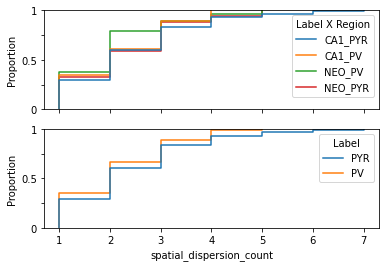

Median of pyramidal spatial_dispersion_count column is 2.0 [1.0, 3.0]
Median of pv spatial_dispersion_count column is 2.0 [1.0, 3.0]
KS statistical test results for feature spatial_dispersion_count are p-value=0.9121871923733712 (statistic=0.05996001059960011)
Mann-Whitney statistical test results for feature spatial_dispersion_count are p-value=0.05947074375001624 (statistic=18753.5)


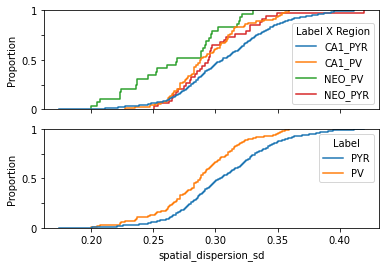

Median of pyramidal spatial_dispersion_sd column is 0.3039284703904997 [0.2803524278702199, 0.33199647480016214]
Median of pv spatial_dispersion_sd column is 0.2876386730046274 [0.26684181147359354, 0.3098306369233389]
KS statistical test results for feature spatial_dispersion_sd are p-value=0.00015128453328405733 (statistic=0.23851509238515092)
Mann-Whitney statistical test results for feature spatial_dispersion_sd are p-value=3.01903110500074e-06 (statistic=14727.0)


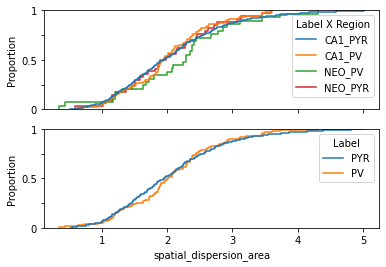

Median of pyramidal spatial_dispersion_area column is 1.949758789760716 [1.4500550096864977, 2.53989779183307]
Median of pv spatial_dispersion_area column is 2.0183725445234524 [1.6351879580259716, 2.4400172071542947]
KS statistical test results for feature spatial_dispersion_area are p-value=0.2864109833372931 (statistic=0.10703187107031871)
Mann-Whitney statistical test results for feature spatial_dispersion_area are p-value=0.28902062630204317 (statistic=20014.0)
dep_red


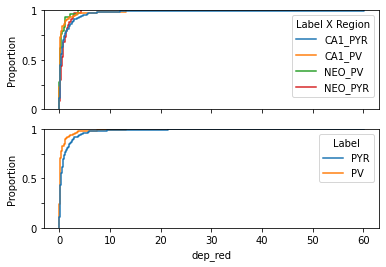

Median of pyramidal dep_red column is 0.34040178571428575 [0.10335286458333336, 1.0742187500000002]
Median of pv dep_red column is 0.15625000000000003 [0.04882812500000001, 0.3515625000000001]
KS statistical test results for feature dep_red are p-value=3.524222464856841e-06 (statistic=0.2817084628170846)
Mann-Whitney statistical test results for feature dep_red are p-value=7.042182987126458e-06 (statistic=14970.5)
dep_sd


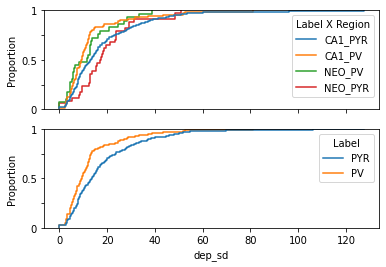

Median of pyramidal dep_sd column is 13.501543121683044 [7.724887500988237, 23.530022930547496]
Median of pv dep_sd column is 9.375000000000002 [5.412658773652741, 13.258252147247767]
KS statistical test results for feature dep_sd are p-value=6.145050753580961e-06 (statistic=0.2757582327575823)
Mann-Whitney statistical test results for feature dep_sd are p-value=3.4421551438183915e-05 (statistic=15453.0)
fzc_red


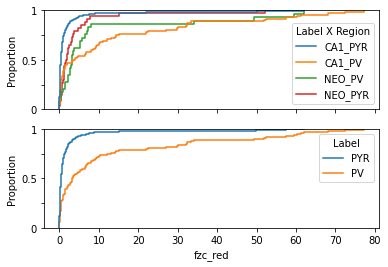

Median of pyramidal fzc_red column is 0.44270833333333354 [0.13206845238095238, 1.3876488095238098]
Median of pv fzc_red column is 3.3258928571428577 [0.4910714285714287, 12.01822916666667]
KS statistical test results for feature fzc_red are p-value=1.333377852574813e-13 (statistic=0.42323721423237215)
Mann-Whitney statistical test results for feature fzc_red are p-value=6.472043841153294e-14 (statistic=10888.5)
fzc_sd


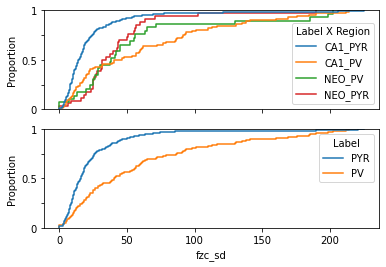

Median of pyramidal fzc_sd column is 15.934435979977454 [8.838834764831846, 26.331065061842697]
Median of pv fzc_sd column is 40.625 [17.41048534648015, 86.277169633687]
KS statistical test results for feature fzc_sd are p-value=3.2244762415700734e-11 (statistic=0.38397051383970515)
Mann-Whitney statistical test results for feature fzc_sd are p-value=2.295968192772649e-12 (statistic=11540.0)
szc_red


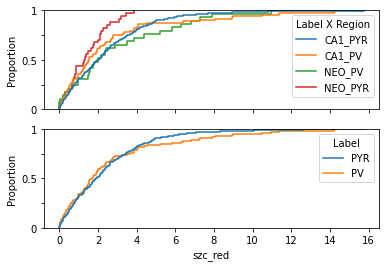

Median of pyramidal szc_red column is 1.9042968750000004 [0.7734375000000001, 3.450520833333333]
Median of pv szc_red column is 1.6927083333333341 [0.6808035714285715, 3.481445312500001]
KS statistical test results for feature szc_red are p-value=0.5652932005444062 (statistic=0.0850858808508588)
Mann-Whitney statistical test results for feature szc_red are p-value=0.33957471068946776 (statistic=20204.0)
szc_sd


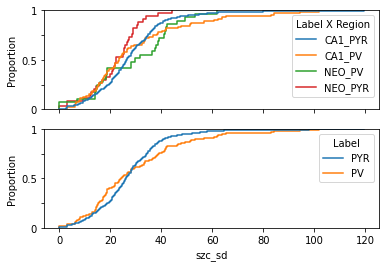

Median of pyramidal szc_sd column is 26.040833319999575 [18.802643944387302, 34.33947027474362]
Median of pv szc_sd column is 24.11632688081297 [15.590239111558088, 38.90593624371479]
KS statistical test results for feature szc_sd are p-value=0.051178161273966793 (statistic=0.1478644214786442)
Mann-Whitney statistical test results for feature szc_sd are p-value=0.47471106480328346 (statistic=20670.5)
dep_graph_avg_speed


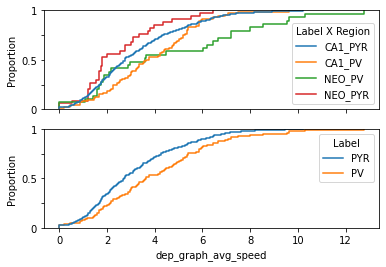

Median of pyramidal dep_graph_avg_speed column is 2.7241276490366344 [1.6788565001958649, 4.269606207002616]
Median of pv dep_graph_avg_speed column is 3.6338446424826065 [2.17351551495127, 5.38728905692902]
KS statistical test results for feature dep_graph_avg_speed are p-value=0.002973996549881286 (statistic=0.19753800197538002)
Mann-Whitney statistical test results for feature dep_graph_avg_speed are p-value=0.00031341921359938135 (statistic=16199.5)
dep_graph_slowest_path


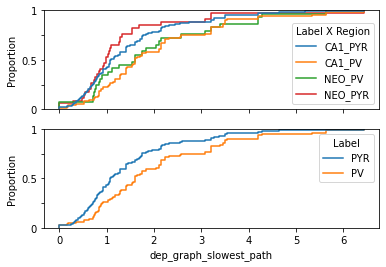

Median of pyramidal dep_graph_slowest_path column is 1.0719867329195616 [0.7146578219463744, 1.7545369759569047]
Median of pv dep_graph_slowest_path column is 1.6079800993793425 [0.9162456945817025, 2.5727681590069484]
KS statistical test results for feature dep_graph_slowest_path are p-value=0.00017732626925792694 (statistic=0.23656380236563804)
Mann-Whitney statistical test results for feature dep_graph_slowest_path are p-value=1.4038612210464578e-05 (statistic=15176.0)
dep_graph_fastest_path


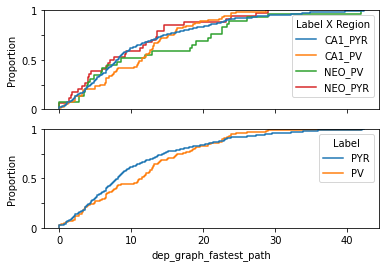

Median of pyramidal dep_graph_fastest_path column is 8.103285737519831 [4.200893166348617, 14.436628283865367]
Median of pv dep_graph_fastest_path column is 11.517429221617473 [4.923459995407444, 16.349494083428095]
KS statistical test results for feature dep_graph_fastest_path are p-value=0.005870659986213167 (statistic=0.18689022186890222)
Mann-Whitney statistical test results for feature dep_graph_fastest_path are p-value=0.059744876513023994 (statistic=18681.0)
fzc_graph_avg_speed


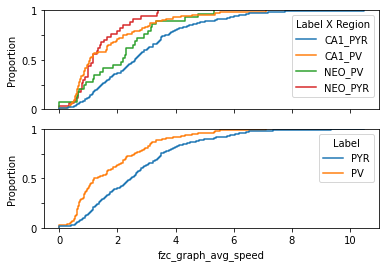

Median of pyramidal fzc_graph_avg_speed column is 2.455837108303262 [1.3667606767699745, 3.5090739519138094]
Median of pv fzc_graph_avg_speed column is 1.206533030770409 [0.684606297930945, 2.5779581386626726]
KS statistical test results for feature fzc_graph_avg_speed are p-value=1.4571555742026732e-06 (statistic=0.2908385729083857)
Mann-Whitney statistical test results for feature fzc_graph_avg_speed are p-value=1.6546400722700303e-08 (statistic=13396.0)
fzc_graph_slowest_path


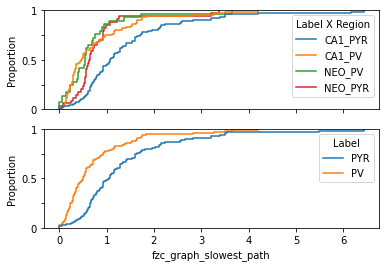

Median of pyramidal fzc_graph_slowest_path column is 1.0499523798725348 [0.6572734202503906, 1.6198331718645167]
Median of pv fzc_graph_slowest_path column is 0.4947631075013363 [0.2679966832298904, 0.928]
KS statistical test results for feature fzc_graph_slowest_path are p-value=7.993605777301127e-15 (statistic=0.44094336440943366)
Mann-Whitney statistical test results for feature fzc_graph_slowest_path are p-value=1.0425707073731018e-13 (statistic=10973.5)
fzc_graph_fastest_path


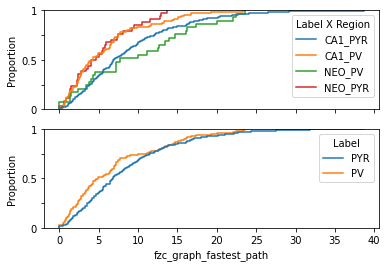

Median of pyramidal fzc_graph_fastest_path column is 6.772446440613193 [3.5811505988778403, 11.514459303621134]
Median of pv fzc_graph_fastest_path column is 4.909010458410523 [2.4174848497172348, 9.945477269098873]
KS statistical test results for feature fzc_graph_fastest_path are p-value=0.014980865251845388 (statistic=0.1711112717111127)
Mann-Whitney statistical test results for feature fzc_graph_fastest_path are p-value=0.005253424018689419 (statistic=17346.5)
szc_graph_avg_speed


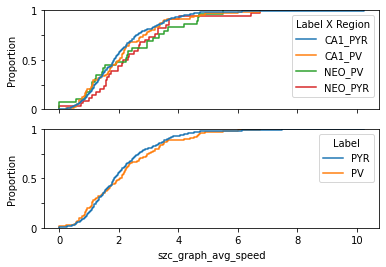

Median of pyramidal szc_graph_avg_speed column is 1.844381349753281 [1.2328558968649994, 2.674786191953684]
Median of pv szc_graph_avg_speed column is 2.0349259785577702 [1.0999705308581738, 2.947634046105095]
KS statistical test results for feature szc_graph_avg_speed are p-value=0.5475530646321427 (statistic=0.0862903808629038)
Mann-Whitney statistical test results for feature szc_graph_avg_speed are p-value=0.3426049767562815 (statistic=20215.0)
szc_graph_slowest_path


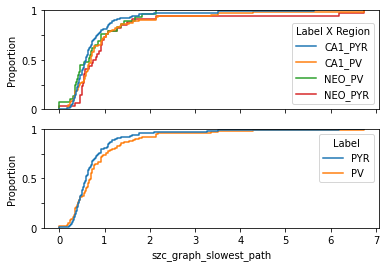

Median of pyramidal szc_graph_slowest_path column is 0.5847200361379428 [0.4268749491621899, 0.8726453624752957]
Median of pv szc_graph_slowest_path column is 0.7016249361449522 [0.4092812127512221, 1.0244998779892558]
KS statistical test results for feature szc_graph_slowest_path are p-value=0.10783180222859601 (statistic=0.13177230131772302)
Mann-Whitney statistical test results for feature szc_graph_slowest_path are p-value=0.08023485690088611 (statistic=18885.5)
szc_graph_fastest_path


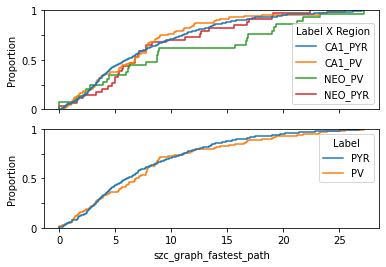

Median of pyramidal szc_graph_fastest_path column is 6.050499389946279 [3.269596077049673, 11.11529955540703]
Median of pv szc_graph_fastest_path column is 6.888666689382895 [3.2373647367774785, 11.056567747149863]
KS statistical test results for feature szc_graph_fastest_path are p-value=0.671504751475072 (statistic=0.0780756907807569)
Mann-Whitney statistical test results for feature szc_graph_fastest_path are p-value=0.3274279399719764 (statistic=20159.5)


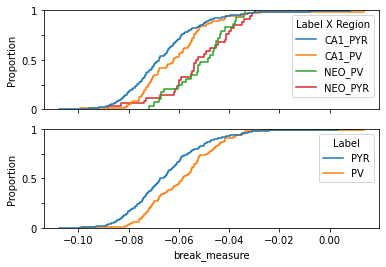

Median of pyramidal break_measure column is -0.06740300483065009 [-0.07585017319496175, -0.05636417833471949]
Median of pv break_measure column is -0.05851787550397002 [-0.07009899023265276, -0.0492752908563127]
KS statistical test results for feature break_measure are p-value=0.00016262608789863187 (statistic=0.23764785237647854)
Mann-Whitney statistical test results for feature break_measure are p-value=7.850489590692033e-06 (statistic=15002.0)
fwhm


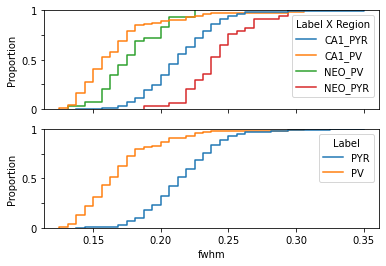

Median of pyramidal fwhm column is 0.21250000000000002 [0.2, 0.23125]
Median of pv fwhm column is 0.1625 [0.15000000000000002, 0.18125000000000002]
KS statistical test results for feature fwhm are p-value=2.798809711954462e-40 (statistic=0.6997904169979041)
Mann-Whitney statistical test results for feature fwhm are p-value=3.647660494961913e-34 (statistic=4625.5)


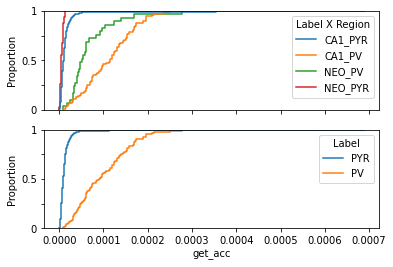

Median of pyramidal get_acc column is 8.96608924294577e-06 [5.120172753865054e-06, 1.4292867568851908e-05]
Median of pv get_acc column is 9.135971909877065e-05 [4.8578204737098e-05, 0.00013887675732008809]
KS statistical test results for feature get_acc are p-value=2.0698112226578784e-69 (statistic=0.859796198597962)
Mann-Whitney statistical test results for feature get_acc are p-value=6.7986977744958744e-49 (statistic=1240.0)
max_speed


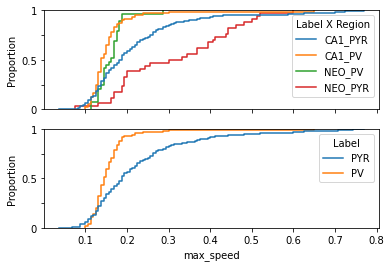

Median of pyramidal max_speed column is 0.1875 [0.1375, 0.2625]
Median of pv max_speed column is 0.14375000000000002 [0.13125, 0.16875]
KS statistical test results for feature max_speed are p-value=1.4240830736866883e-12 (statistic=0.4067355640673556)
Mann-Whitney statistical test results for feature max_speed are p-value=3.401011980632095e-09 (statistic=13039.0)


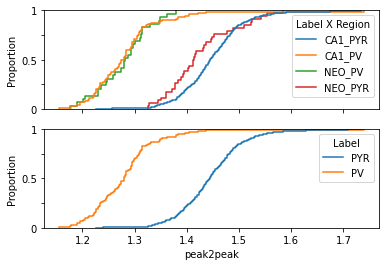

Median of pyramidal peak2peak column is 1.443493238846164 [1.4064700610447258, 1.4816126672054644]
Median of pv peak2peak column is 1.2798575554535432 [1.234690943324784, 1.3086804186665344]
KS statistical test results for feature peak2peak are p-value=3.514867342457495e-68 (statistic=0.8549300185493002)
Mann-Whitney statistical test results for feature peak2peak are p-value=3.661492538239374e-48 (statistic=1393.0)
trough2peak


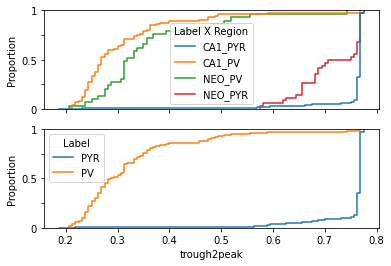

Median of pyramidal trough2peak column is 0.76875 [0.7625000000000001, 0.76875]
Median of pv trough2peak column is 0.28750000000000003 [0.25, 0.35000000000000003]
KS statistical test results for feature trough2peak are p-value=1.383442211945247e-104 (statistic=0.9482305894823059)
Mann-Whitney statistical test results for feature trough2peak are p-value=5.888409566454892e-58 (statistic=875.5)
rise_coef


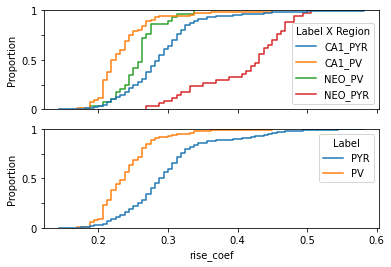

Median of pyramidal rise_coef column is 0.28750000000000003 [0.25625000000000003, 0.31875000000000003]
Median of pv rise_coef column is 0.23750000000000002 [0.21250000000000002, 0.2625]
KS statistical test results for feature rise_coef are p-value=1.627431725735227e-21 (statistic=0.5272096552720965)
Mann-Whitney statistical test results for feature rise_coef are p-value=2.15454100140333e-21 (statistic=8209.0)


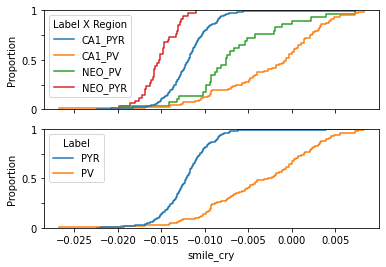

Median of pyramidal smile_cry column is -0.012122907023162606 [-0.013745582920444657, -0.010565829589556541]
Median of pv smile_cry column is -0.0027221289101205803 [-0.008634026439545223, 0.0013950600906285412]
KS statistical test results for feature smile_cry are p-value=1.8268375748247892e-39 (statistic=0.6937438269374383)
Mann-Whitney statistical test results for feature smile_cry are p-value=5.728841300329368e-35 (statistic=4395.0)


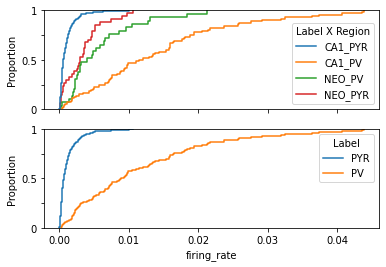

Median of pyramidal firing_rate column is 0.0006686820849674499 [0.0003520006055522299, 0.0014698247388822052]
Median of pv firing_rate column is 0.008954326342685151 [0.0033922496620757536, 0.016349134401420974]
KS statistical test results for feature firing_rate are p-value=6.426758957403587e-43 (statistic=0.7186769771867698)
Mann-Whitney statistical test results for feature firing_rate are p-value=1.020320052190009e-40 (statistic=3025.0)


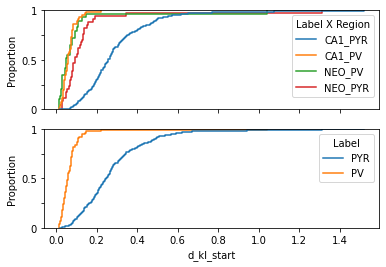

Median of pyramidal d_kl_start column is 0.2461119660987149 [0.16535870587036172, 0.3425914340572358]
Median of pv d_kl_start column is 0.058488332595699175 [0.03692354661680194, 0.0785982065910914]
KS statistical test results for feature d_kl_start are p-value=3.1542340277142394e-55 (statistic=0.794271397942714)
Mann-Whitney statistical test results for feature d_kl_start are p-value=2.187208442695135e-44 (statistic=2203.0)


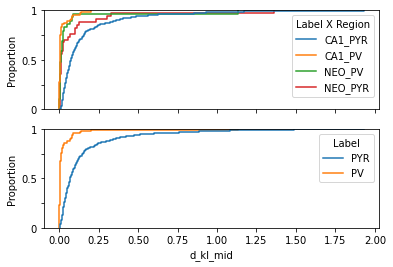

Median of pyramidal d_kl_mid column is 0.06918248108557219 [0.03206672388374797, 0.15041318225140465]
Median of pv d_kl_mid column is 0.003950466445928457 [0.001709356879618696, 0.012318641257718626]
KS statistical test results for feature d_kl_mid are p-value=6.03843319453836e-41 (statistic=0.704656597046566)
Mann-Whitney statistical test results for feature d_kl_mid are p-value=6.056785875272988e-35 (statistic=4401.0)


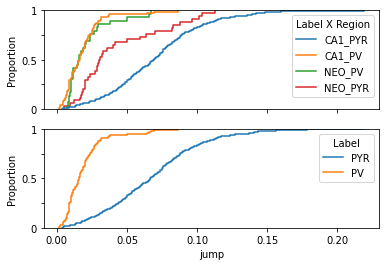

Median of pyramidal jump column is 0.06659051846046042 [0.044092939283954205, 0.08787009221329356]
Median of pv jump column is 0.015590617989256669 [0.009456312534883623, 0.02357659697139744]
KS statistical test results for feature jump are p-value=7.28477028234462e-49 (statistic=0.7576064175760642)
Mann-Whitney statistical test results for feature jump are p-value=9.307455346395801e-39 (statistic=3480.0)


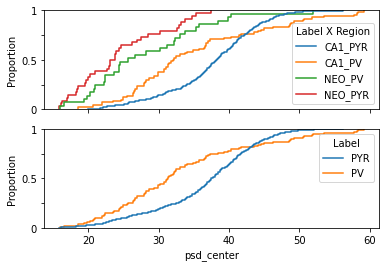

Median of pyramidal psd_center column is 37.4709754172436 [32.55193998271295, 41.679845372767275]
Median of pv psd_center column is 31.276064720708113 [26.302204688134875, 37.27640829500633]
KS statistical test results for feature psd_center are p-value=1.5319300272764735e-09 (statistic=0.3535207535352075)
Mann-Whitney statistical test results for feature psd_center are p-value=2.8018428488954244e-06 (statistic=14706.0)


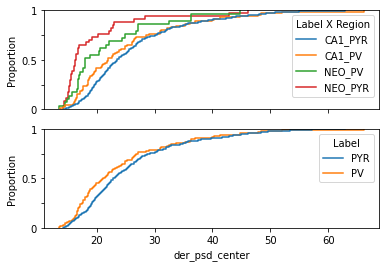

Median of pyramidal der_psd_center column is 22.908190099202642 [19.23306344655817, 28.821307000895942]
Median of pv der_psd_center column is 21.11659154319602 [17.572195583923627, 26.79598930688058]
KS statistical test results for feature der_psd_center are p-value=0.012239237201381759 (statistic=0.17462841174628413)
Mann-Whitney statistical test results for feature der_psd_center are p-value=0.011925424026615335 (statistic=17745.0)
rise_time


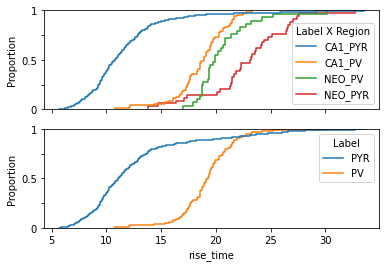

Median of pyramidal rise_time column is 11.0625 [9.40625, 13.6875]
Median of pv rise_time column is 19.3125 [17.75, 20.625]
KS statistical test results for feature rise_time are p-value=2.0033193025637695e-54 (statistic=0.7899111078991111)
Mann-Whitney statistical test results for feature rise_time are p-value=4.33978733407594e-33 (statistic=4868.5)


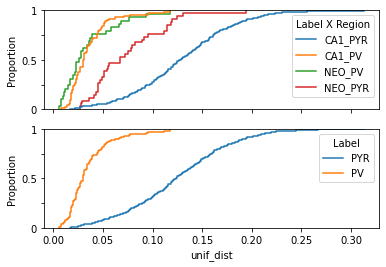

Median of pyramidal unif_dist column is 0.12343066992900475 [0.08971227847774707, 0.15921456205173112]
Median of pv unif_dist column is 0.030161165964181808 [0.020183902466827268, 0.044072063856135935]
KS statistical test results for feature unif_dist are p-value=9.055511065369001e-54 (statistic=0.7862976078629761)
Mann-Whitney statistical test results for feature unif_dist are p-value=1.59543507777811e-44 (statistic=2173.0)


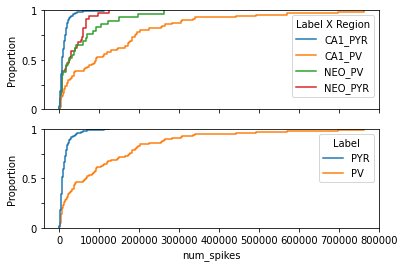

Median of pyramidal num_spikes column is 8368.0 [4494.5, 16929.0]
Median of pv num_spikes column is 66850.0 [13031.0, 174802.0]
KS statistical test results for feature num_spikes are p-value=1.6395223862048898e-22 (statistic=0.5386042253860422)
Mann-Whitney statistical test results for feature num_spikes are p-value=8.379819894455854e-22 (statistic=8068.5)


In [5]:
for feature in df.columns:
    if feature in ['region', 'label', 'Label X Region', 'Label']:
        continue
    change_col(df, feature)
    fig, ax = plt.subplots(2, sharex=True, sharey=True)
    _ = sns.ecdfplot(data=df, x=feature, hue="Label", ax=ax[1])
    _ = sns.ecdfplot(data=df, x=feature, hue="Label X Region", ax=ax[0])
    ax[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax[0].set_yticklabels(['0', '', '0.5', '', '1'])
    
    plt.show()
    
    col_pyr = df[feature][df.label == 1].to_numpy()
    col_pv = df[feature][df.label == 0].to_numpy()
    
    pyr_median, pyr_prec25, pyr_prec75 = np.percentile(col_pyr, [50, 25, 75])
    pv_median, pv_prec25, pv_prec75 = np.percentile(col_pv, [50, 25, 75])
    
    print(f"Median of pyramidal {feature} column is {pyr_median} [{pyr_prec25}, {pyr_prec75}]")
    print(f"Median of pv {feature} column is {pv_median} [{pv_prec25}, {pv_prec75}]")

    statistic, p_val = stats.kstest(col_pyr, col_pv)
    print(f"KS statistical test results for feature {feature} are p-value={p_val} (statistic={statistic})")
    
    statistic, p_val = stats.mannwhitneyu(col_pyr, col_pv)
    print(f"Mann-Whitney statistical test results for feature {feature} are p-value={p_val} (statistic={statistic})")